# Исследование компютерных игр

**Входные данные:** Исторические данные о продажах компьютерных игр до 2016 года, оценки пользователей и экспертов, жанры и платформы.

**Цель исследования:** Проанализировать данные с разных сторон, узнать статистику по платформам, составить портрет пользователя для каждого региона, проверить гипотезы. Выявить определяющие успешность игры закономерности. 

**Описание данных:** По каждй игре доступны данные о том, с какой платформой она совместима, когда была выпущена, жанр, продажи в Северной Америке, Европе, Японии и других странах в миллионах проданных копий, оценка от пользователей и критиков и от ESRB, который определяет возрастной ценз пользователей.

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Ход исследования:**
1. Изучение общей информации о данных
2. Предобработка данных
3. Исследовательский аналз данных
4. Представление портрета пользователя для регионов
5. Проверка гипотез

## Шаг 1. Обзор данных

In [296]:
import pandas as pd                                 # импорт библиотеки пандас
import matplotlib.pyplot as plt                     # импорт библиотеки Matplotlib
import numpy as np                                  # импорт библиотеки numpy
from scipy import stats as st                       # импорт библиотеки scipy
import seaborn as sns                               # импорт библиотеки seaborn

In [297]:
data = pd.read_csv('games.csv')           # сохраняю в переменную датафрей

In [298]:
data.head(15)                                       # вывожу первые строки таблицы

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [299]:
data.info()                         # общая информация о столбцах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [300]:
data.shape                        # размер датафрейма

(16715, 11)

Проверим количество полных дубликатов

In [301]:
data.duplicated().sum()           # колчиество дубликатов

0

## Шаг 2. Предобработка данных.

Посмотрим есть ли в данных неполные дубликаты, игра с одинаковым именем, для одинаковой платформы, одного года выпуска и одного жанра.

In [302]:
data[data.duplicated(subset=['Name', 'Platform', 'Year_of_Release', 'Genre'])]            # колчиество неявных дубликатов

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [303]:
data = data.drop_duplicates(subset=['Name', 'Platform', 'Year_of_Release', 'Genre'])      # удаление неяных дубликатов

Всего в фатафрейме 11 столбцов, присутствуют как строковые, так и числовые типы данных, но наблюдаются некие неточности, рейтинг пользователей имеет строчный тип, но должен быть числовой, более подробно разберем это во 2 шаге. Также различается количество строк, в некоторых в 2 раза, это мы также подробнее разберем во 2 шаге. Всего записей в датафрейме 16715. В последнем столбце с рейтингом от организации ESRB какие-то буквы, которая обозначает возрастную категорию игры. Были обнаружены 2 неполных дубликата, которые в последствие удалены 

### Приведение названий столбцов к общему виду

Для начала необходимо преобразовать названия столбцов - приведем все к нижнему регистру

In [304]:
data.columns = data.columns.str.lower()                 # привожу список названий столбцов к нижнему регистру и пересохраняю

### Преобразование типов данных

При первом взгляде, необходимо поменять типы данных в двух столбцах: год выпуска игры - вещественный поменять на целочисленный и оценка пользователей - строчный на вещественный. Посмотрим подробнее на эти столбцы

* **Год выпуска** - веществвенный тип, изменим на целочисленный с пропусками.

In [305]:
data['year_of_release'] = data['year_of_release'].astype('Int64')         # меняю тип данных на целочисленный, 
                                                                          # но чтоб остались пропуски

* **Оценка пользователей** - строковый, глядя на уникальные значения в этом столбце можно увидеть пропуски - nan и строковое значение "tdb". "tdb" заменим на Nan - этих значений у нас нет. Изменим тип числовых данных на вещественный

Аббревиатура 'tbd' - от английского To Be Determined (будет определено) или To Be Decided (будет решено), рейтинг игры еще не известен, поэтому мы можем заменить его на обычные пропуски nan

In [306]:
data['user_score'].unique()                                               # вывожу значения столбца с рейтингом от пользователей

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [307]:
data['user_score']=pd.to_numeric(data['user_score'], errors='coerce')      # меняю тип данных на вещественный, 
                                                                           # некорректные значения принудительно заменю на NaN

### Работа с пропусками

Рассмотрим по порядку все столбцы, в которых присутствуют пропуски, но вначале взглянем где сколько

In [308]:
data.isna().sum()                                                          # смотрю количество пропусков в каждом столбце 

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64

* **Название игры** - всего 1 пропуск 

In [309]:
data[data['name'].isna()]                                #вывожу записи, в которых отсутствует название игр

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


Давольно старая игры, о которой известны только продажи, причем продано достаточно много копий в Северной Америке

In [310]:
data = data.dropna(subset=['name'])                       # Удаляю строки, в которых отстутствует название

In [311]:
data['name'].isna().sum()                                 # Контролирую количество пропусков

0

В этой же строке пропущено название жанра игры - таких пропусков в таблице всего 1, так что он тоже пропал.

* **Год выпуска** - 269 пропусков, их мы никак заполнить не сможем, поэтому просто удаляем, процент таких игр 1.6%, много данных не теряем

In [312]:
data = data.dropna(subset=['year_of_release'])            # Удаляю строки, в которых отстутствует год выпуска

In [313]:
data['year_of_release'].isna().sum()                      # Контролирую количество пропусков

0

* **Пропуски в оценках: от критиков, пользователей и возрастное ограничение** - пропусков очень много в каждом столбике, больше половины, трогать их не будем, потому что большая часть значений пропущена. Исследование будет проводится на том, что имеем 

### Создание вспомогательного столбца

**Общая сумма продажи по всем регионам**

In [314]:
data.insert(4, 'sales', data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1))

In [315]:
data.head(15)                                              # вывожу первые 15 строк для ознакомления 

,name,platform,year_of_release,genre,sales,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,82.54,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,40.24,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,35.52,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,31.38,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,30.26,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,29.80,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,28.91,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,28.32,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,28.31,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Судя по всему, данные изначально отсортированы по убыванию суммарных продаж. Эту закономерность видно по первым 15 строкам датафрейма

**Вывод:** Данные подготовлены к дальнейшему исследованию. Были изменены типы данных, удалены строки, где нет информации о дате релиза, добавлен столбик с общими продажами. По первому знакомству с данными можно сказать только то, что очень много данных нет по оценкам, будем больше ориентироваться на продажи

## Шаг 3. Исследовательский анализ данных

### Статистика по годам

In [316]:
data.groupby(by='year_of_release')['name'].count()      # группирую данные по количеству выпущенных игр в год

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Посмотрим на гистограмму количества игр по годам

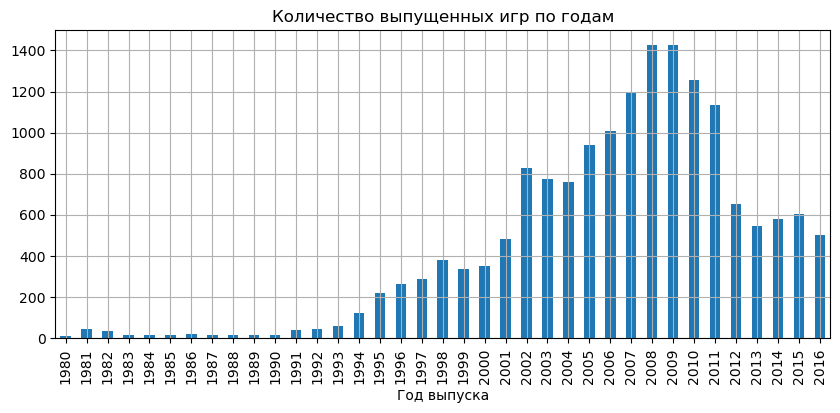

In [317]:
data.groupby(by='year_of_release')['name'].count().plot.bar(figsize=(10,4), grid=True, 
                                                            title='Количество выпущенных игр по годам',
                                                            xlabel='Год выпуска')
plt.show()

Всего данных есть за 37 лет. Больше всего игр вышло в 2008 году

До 1992 не наблюдается рост количества игр с каждым годом, затем игр с каждым годом выпускалось всё больше. Заметен огромный пик с 2005 года до 2011 года. В 2012 году количество уменьшилось чуть ли не вдвое.

Но данные за все года нам не нужны, нам важна актуальная информация, чтобы сделать прогноз на 2017 год. Возьмем данные за последние 5 лет, чтобы не было больших скачков, раньше и не надо, это будут довольно старые данные и прогноз может быть не точным. За последние 5 лет данных, думаю, вполне хватит.

### Статистика по платформам

Глянем на самые популярные приставки за все года.

In [318]:
data.pivot_table(index=['platform'], values='sales', aggfunc='sum').sort_values(by='sales', ascending=False).head(10)
# строю сводную таблицу по количеству продаж игр на каждую приставку и сортирую по убыванию и вывожу первые 10

,sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Сделаем срез по первым пяти популярным приставкам и построим по ним столбчатубю диаграмму: сколько в каком году купили игр на ту или иную приставку

In [319]:
favorite_platform = data.groupby('platform').agg({'sales': 'sum'}).sort_values(by='sales', ascending=False).head(5).index.to_list()
# сохраняю в переменную список из пяти самых популярных приставок

In [320]:
top = data.query('platform in @favorite_platform')
# делаю срез с обращением к внешней переменной, оставляю игры только для приставок из топа

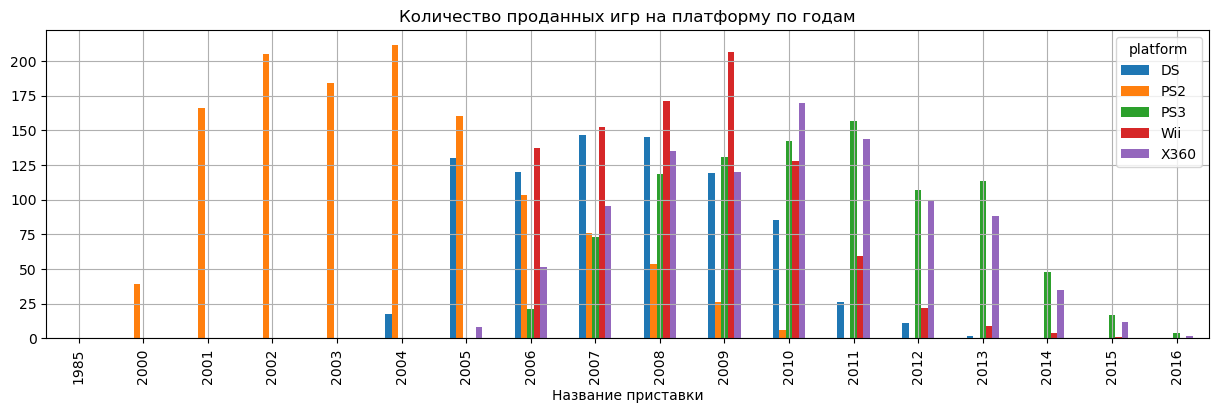

In [321]:
top_plot = (
    top
    .pivot_table(index=['year_of_release'], columns='platform', values='sales', aggfunc='sum')
)
top_plot.plot(kind='bar', grid=True, title='Количество проданных игр на платформу по годам', xlabel='Название приставки',
         figsize=(15,4))
# По созданному выше датафрейму строю для начала сводную таблицу, где для каждого года указано количество проданных игр
# по приставкам и строю столбчатую диаграмму 
plt.show()

Наглядность столбчатой диаграммы под вопросом, сейчас все объясню по каждый из пяти приставок: 
* Оранжевая - приставка  **PS2** самая первая популярная приставка. Выпущена была в 1999 году, ее пик пришелся на 2002-2004 года, с каждым последующим годом игр на нее производилось всё меньше. Обозначим границы ее популярности *с 2001 по 2005 года*.
* В 2004 году появилась синяя - **DS**, пик прооизводительности ее игр пришелся на *2005-2009 года*, популярность угасла полностью к 2013 году.
* Следующая приставка которая появилась - филлетовые столбики - **X360** - популярность имеет нормальное распределение, самый продуктивный год по выпуску игр - 2011, года популярности: *2008-2011*. 
* В глаза бросаются красные столбики - **Wii**, выпущенная в ноябре 2006 году и имеющая сразу большие продажи, до 2009 игр покупали всё больше и больше, после пика популярности - 2009 года, ее игры стали покупать намного меньше, популярность быстро затухала. Года, когда игры на Wii были востребованы: *2006-2010 года*. 
* Зелененькие столбики - **PS3**. Распределение нормальное, нет сильно выбивающихся значений, потихонечку становилась популярной и потихочку угасала. Самые прибыльные года для этой приставки: *2008-2011*

Самыми популярными приставками за все время оказались PS2, X360 и PS3. 

В среднем жизненый цикл приставки составляет 10 лет. 
* PS2:  с 1999 до 2010. 
* DS:   с 2004 по 2013. 
* X360: с 2005 до 2016. 
* PS3:  с 2006 по 2016. 
* Wii:  с 2006 по 2015.

А время, которе игра больше всего популярная - 5 лет.

Проведем расчет жизненных циклов популярных платформ, вычтим года выпуска игр из самого последнего самый первый

In [322]:
cycle = top.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']) 
cycle.columns=['first_year', 'last_year']
cycle['years'] = cycle['last_year']-cycle['first_year']
cycle
# создаю сводную таблицу с первым (минимальным) и последним(максимальным) годом выпуска, 
# переименовываю столбцы, добавляю столбец с разницей и вывожу

,first_year,last_year,years
platform,,,
DS,1985,2013,28
PS2,2000,2011,11
PS3,2006,2016,10
Wii,2006,2016,10
X360,2005,2016,11


У четырех из пяти платформ жизненный цикл в районе 10-11 лет, однако на DS игры выпускались аж в 1985 году, судя по графику выше этих игр очень мало и за другие годы до 2000 игр не было, поэтому получается <b>13 лет</b> на эту приставку выпускались игры. <b>Средний жизненный цикл этих пяти приставок составляет 11 лет

Средний жизненный цикл платформы:

In [323]:
data.groupby('platform')['year_of_release'].nunique().mean()

7.67741935483871

### Выбор актуального периода

Как мы сказали в пункте 3.1, чтобы сделать правдивый прогноз, необходимы свежие данные, с 2012 года до нынешнего, 2016. Сделаем срез по этим годам 

In [324]:
new_data = data.query('year_of_release > 2011')                 # оставила в датафрейме тлько актуальные данные 2012-2016

C:\Users\Александра\AppData\Local\Temp\ipykernel_16076\863421767.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  new_data = data.query('year_of_release > 2011')                 # оставила в датафрейме тлько актуальные данные 2012-2016


In [325]:
years = new_data.groupby(by='year_of_release')['name'].count()  # количетво выпущенных игр в год
years

year_of_release
2012    652
2013    544
2014    581
2015    606
2016    502
Name: name, dtype: int64

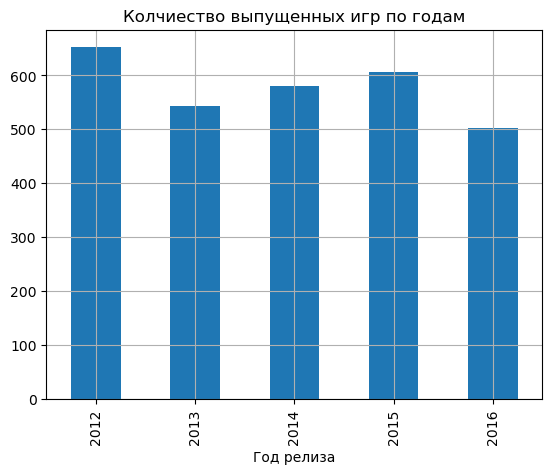

In [326]:
years.plot(kind='bar', grid=True, 
           title='Колчиество выпущенных игр по годам', xlabel='Год релиза')   # диаграмма по количествам игр в год
plt.show()

Максимально было 653 штуки - 2012 год, минимально в 2016 году - 502 штуки. В среднем выпускали 577 игр в год. Посмотрим основную информацию о датафрейме и о пропусках. В 2016 году выпешено наименьшее количество игр, данные за этот годо неполные. 

In [327]:
new_data.info()                                  # смтрю основную информацию об актуальных данных

<class 'pandas.core.frame.DataFrame'>
Index: 2885 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2885 non-null   object 
 1   platform         2885 non-null   object 
 2   year_of_release  2885 non-null   Int64  
 3   genre            2885 non-null   object 
 4   sales            2885 non-null   float64
 5   na_sales         2885 non-null   float64
 6   eu_sales         2885 non-null   float64
 7   jp_sales         2885 non-null   float64
 8   other_sales      2885 non-null   float64
 9   critic_score     1311 non-null   float64
 10  user_score       1530 non-null   float64
 11  rating           1610 non-null   object 
dtypes: Int64(1), float64(7), object(4)
memory usage: 295.8+ KB


In [328]:
new_data.isna().sum()                             # смотрю оставшееся количество пропусуков

name                  0
platform              0
year_of_release       0
genre                 0
sales                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1574
user_score         1355
rating             1275
dtype: int64

Итого имеем записи о 2886 игр. Пропуски есть в последних трех столбцах с оценкой, пропуски почти в половине датафрейма

### Лидирующие в последние годы платформы

In [329]:
new_data.pivot_table(index=['platform'], values='sales', aggfunc='sum').sort_values(by='sales', ascending=False).head(5)
# сводная таблица по актуальному датафрейму по количеству проданных игр на каждую приставку в общем

,sales
platform,
PS4,314.14
PS3,288.78
X360,236.54
3DS,194.61
XOne,159.32


За последние 5 лет больше всего покупали игры на PS4, PS3, X360, 3DS и XOne. По сравнению с пунктом 3.2 ушли из топа приставки PS2 и Wii.

In [330]:
top_platform = new_data.query('platform in ["PS4", "PS3", "X360", "3DS", "XOne"]')
# делаю новый датафрейм для построения диаграммы ниже, оставляю только топовые приставки

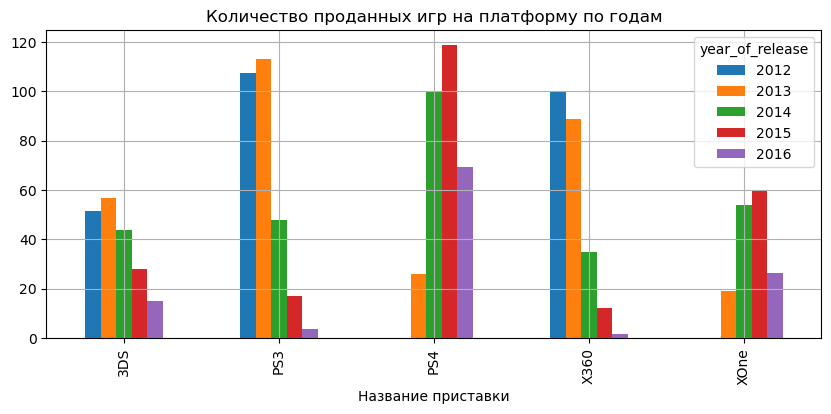

In [331]:
platform_plot = (
    top_platform
    .pivot_table(index=['platform'], columns='year_of_release', values='sales', aggfunc='sum')
    .plot(kind='bar', grid=True, title='Количество проданных игр на платформу по годам', xlabel='Название приставки',
         figsize=(10,4))
)
# делаю действия аналогичные построению диаграммы в пункте 3.2: строю сводную таблицу по годам и по приставкам, 
# суммарную продажу копий игр на нее в этот год и рисую столбчатую диаграмму по ней
plt.show()

По графику можем сказать, что в 2016 году продажи упали у всех платформ, скорей всего, данные были выгружены не в самом конце года, а намного заранее. Для приставок XOne и PS4 данных за 2012 год нет, потому что эти приставки вышли только в конце 2013 года и с каждым последующим годом интерес к играм на эти приставки рос, однако PS4 намного популярнее XOne. Приставки интерес, на которые падает - это X360, 3DS и PS3. Самыми популярными на 2016 год являются XOne и PS4 - продажа игр на эти платформы должна принести хорошую выручку.

### Диаграмма размаха по глобальным продажам игр в разбивке по платформам

Посмотрим на "ящик с усами" для каждой платформы по продажам

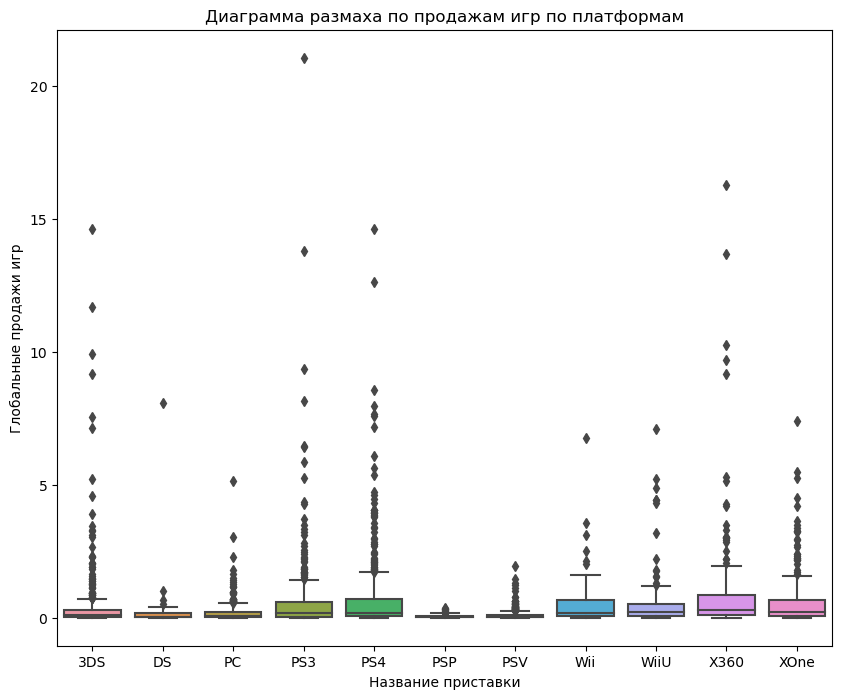

In [332]:
box = plt.subplots(figsize = (10,8))
box = sns.boxplot(data=new_data.sort_values(by='platform'), y='sales', x='platform')
box.set(xlabel="Название приставки")
box.set(ylabel="Глобальные продажи игр")
box.set(title="Диаграмма размаха по продажам игр по платформам")
plt.show()
# строю диаграмму размаха продаж по актуальным данным по какждой консоли

Ничего не понятно, много больших выбросов выше верхнего уса, поставим ограничение по оси OY до 2 миллионов копий

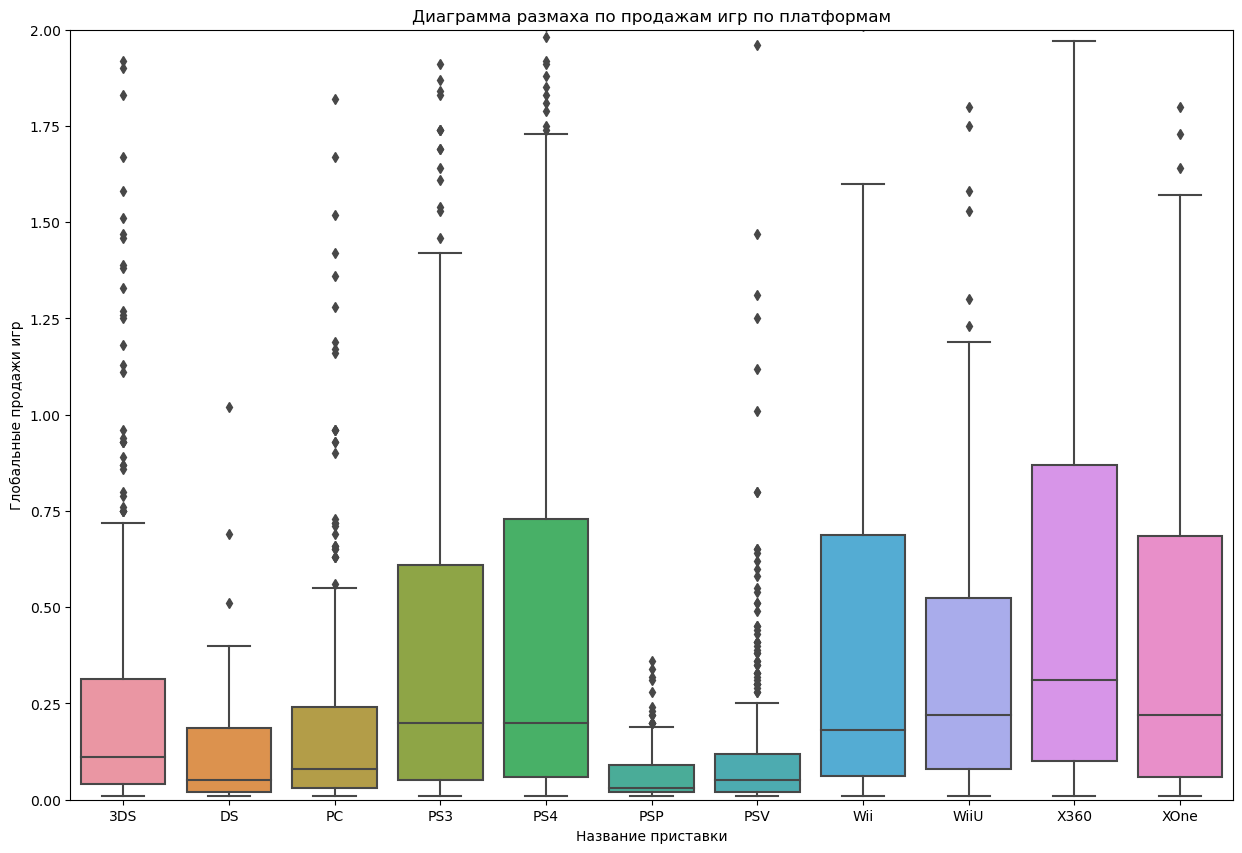

In [333]:
box = plt.subplots(figsize = (15,10))
box = sns.boxplot(data=new_data.sort_values(by='platform'), y='sales', x='platform')
box.set(ylim=(0, 2))
box.set(xlabel="Название приставки")
box.set(ylabel="Глобальные продажи игр")
box.set(title="Диаграмма размаха по продажам игр по платформам")
plt.show()
# строю диаграмму размаха продаж по актуальным данным по какждой консоли с ограничением продаж не больше 2 миллионов

Все нижние усы упираются в 0 - минимальное значение. Верхние усы - это 1.5 межквартильного размаха, добавленного к 3-му квартилю (верхней крышке коробки) - ориентировочная границы нормального размаха, все значения за ней считаются выбросами. Судя по первой диаграмме, без ограничений - выбросов почти для всех платформ очень много. Медиана - линия внутри прямоугольника не стремится к длинному хвосту высоких значений. 

Дополнительно выведем описание данных в числах того, что выше изображено на графике

In [334]:
describe_sales = pd.DataFrame()                                                     # создаю новый чистый датафрейм 
for plat in new_data['platform'].unique():                                          # в цикле заполняю датафрем для каждый 
    describe_sales[plat]=new_data[new_data['platform']==plat]['sales'].describe()   # приставки характеристиками столбца продаж 

display(describe_sales)                                                             # вывожу красиво таблицу

,PS3,X360,PS4,3DS,DS,XOne,WiiU,Wii,PC,PSV,PSP
count,492.000000,292.000000,392.000000,396.000000,31.000000,247.000000,147.000000,54.000000,250.00000,411.000000,173.000000
mean,0.586951,0.810068,0.801378,0.491439,0.404839,0.645020,0.559116,0.655000,0.25060,0.119659,0.064682
std,1.464113,1.712069,1.609456,1.387161,1.439245,1.036139,1.058836,1.165447,0.49464,0.203011,0.071296
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.01000,0.010000,0.010000
25%,0.050000,0.100000,0.060000,0.040000,0.020000,0.060000,0.080000,0.062500,0.03000,0.020000,0.020000
50%,0.200000,0.310000,0.200000,0.110000,0.050000,0.220000,0.220000,0.180000,0.08000,0.050000,0.030000
75%,0.610000,0.870000,0.730000,0.312500,0.185000,0.685000,0.525000,0.687500,0.24000,0.120000,0.090000
max,21.050000,16.270000,14.630000,14.600000,8.060000,7.390000,7.090000,6.760000,5.14000,1.960000,0.360000


Медианное значение количества проданных копий игр наибольшее для X360 - 0.31 милионна штук, за ним XOne и WiiU со значеними 0.22 и замыкает топ пять медианного значения PS3 и PS4 - 0.2. 

За эти 5 лет в общем игр на PS3 и PS4 продали больше, чем на X360, однако типичное среднее по продажам больше у ИксБокса.

Самыми непопулярными по медианному значению оказались игры на консоли PSP, DS, PSV: их типичные продажи 30-50 тысяч штук

### Зависимость продаж от отзывов пользователей и критиков для самой популярной приставки.

Рассмотрим зависимость количества проданных игр на самую популярную приставку от оценки критиков и пользователей.

In [335]:
PS4 = new_data.query('platform == "PS4"')                          # делаю срез актуальных данных только по ПС4 

Сначала рассмотрим зависимость от оценок критиков. Для этого посчитаем корреляцию этих показателей и посотрим лиаграмму рассеяния.

In [336]:
PS4['sales'].corr(PS4['critic_score'])                             # считаю коэффициент корреляции между 
                                                                   # продажами на приставку и оценкой критика

0.40656790206178123

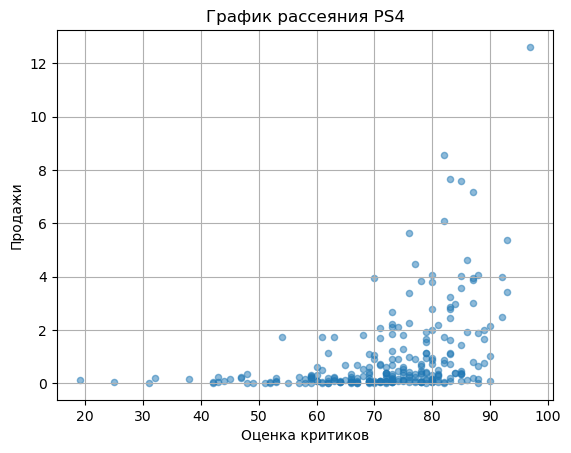

In [337]:
PS4.plot(x='critic_score', y='sales', 
          kind='scatter', 
          title='График рассеяния PS4', alpha=0.5,
          xlabel='Оценка критиков', ylabel="Продажи", grid=True) 
plt.show()
# строю график рассеяния с коэффициетном прозрачности 0.5

Коэффициент корреляции составляет 0.4 - начилие связи есть, но она не очень сильная: на игры консоли PS4 чем оценка критика больше, тем больше продаж имеет. Заметна широкая полоса, стремящаяся вверх, начиная где-то с оценки 50. Игры, которые оценили ниже 50 имеют очень маленькие продажи  

Теперь от отзывов пользователей, также: корреляция и диаграмма рассеения

In [338]:
PS4['sales'].corr(PS4['user_score'])                                # считаю коэффициент корреляции между 
                                                                    # продажами на приставку и оценкой критика

-0.03195711020455643

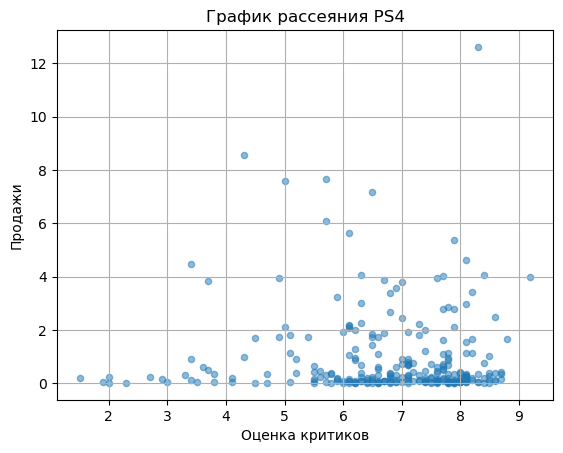

In [339]:
PS4.plot(x='user_score', y='sales', 
          kind='scatter', 
          title='График рассеяния PS4', alpha=0.5,
          xlabel='Оценка критиков', ylabel="Продажи", grid=True) 
plt.show()
# строю график рассеяния с коэффициетном прозрачности 0.3

Коэффициает корреляции близок к нулю - это показывает, что параметры не коррелируют, линейная связь очень слабая, видны точки на графике, когда оценки менее 5, а проданных копий этой игры на PS4 около 9 миллионов. 

По вышеполученным данным можно понять, что пользователи PS4, при покупке игр больше ориентируются на отзывы критиков, чем на юзеров.

### Зависимость продаж от отзывов пользователей и критиков для других топовых приставок.

Посмотрим насколько похожа эта картина для других популярных приставок. Для начала из датафрейма с топовыми приставками уберем данные о PS4, чтобы не было повторений. 

In [340]:
top_platform = top_platform.query('platform != "PS4"')         # Делаю срез данных: исключаю ПС4
top_platform['platform'].unique()                              # Вывожу список оставшихся приставок, по популярности 2-5 места

array(['PS3', 'X360', '3DS', 'XOne'], dtype=object)

3DS
Коэффициент корреляции между продажами и оценкой критиков: 0.32080286953607856

Коэффициент корреляции между продажами и оценкой пользователей: 0.19758263411038596


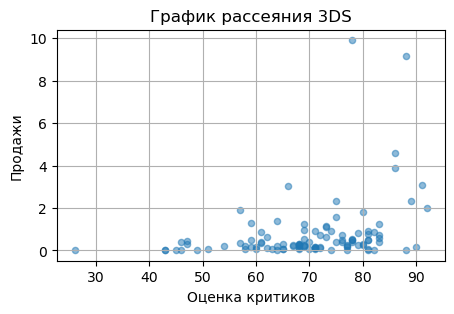

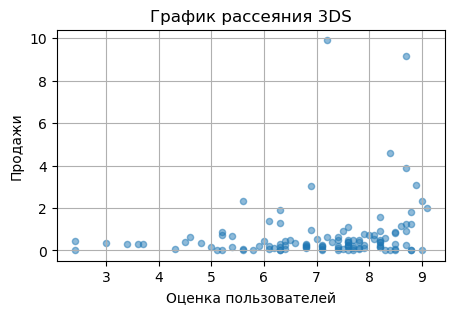

PS3
Коэффициент корреляции между продажами и оценкой критиков: 0.33415175755098564

Коэффициент корреляции между продажами и оценкой пользователей: -0.006205767686051512


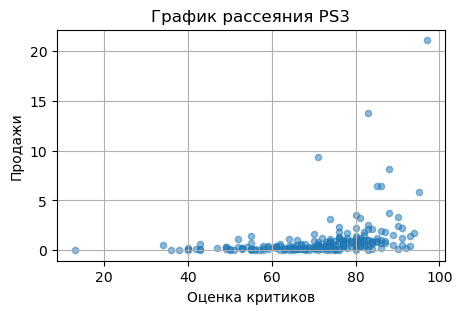

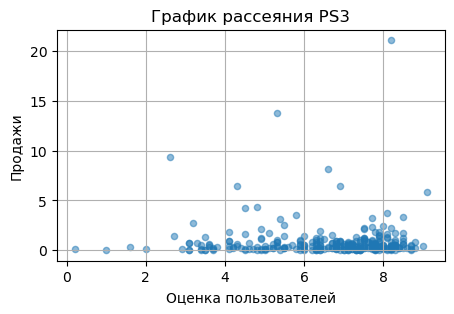

X360
Коэффициент корреляции между продажами и оценкой критиков: 0.36057348885073387

Коэффициент корреляции между продажами и оценкой пользователей: 0.0061639786462133585


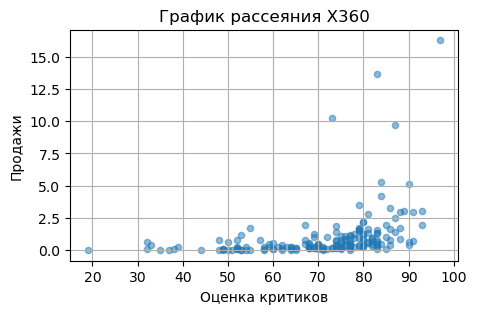

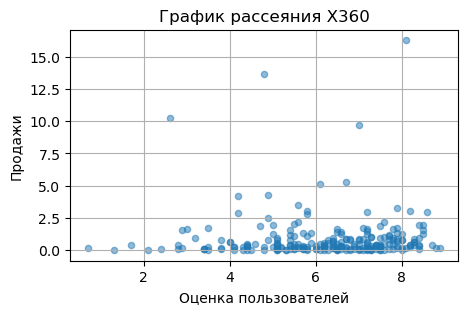

XOne
Коэффициент корреляции между продажами и оценкой критиков: 0.41699832800840153

Коэффициент корреляции между продажами и оценкой пользователей: -0.06892505328279418


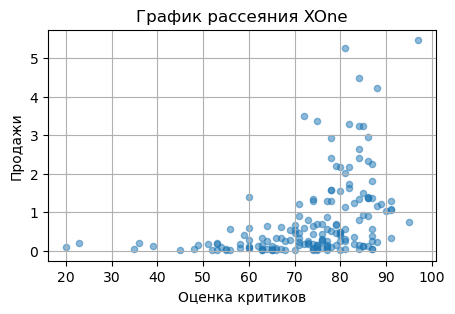

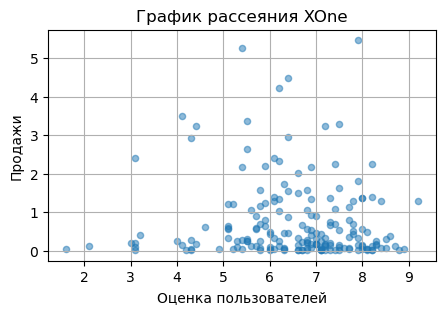

In [341]:
plat = top_platform['platform'].unique()                       # записываю в переменную список имеющихся платформ

# перебираю в цикле платформы и данные таблицы, для структуры вывожу сначала название платформы,
# потом коэффициенты корреляции и только потом диаграмму рассеяния

for plat, game in top_platform.groupby('platform'):
    print(plat)
    
    print(f'Коэффициент корреляции между продажами и оценкой критиков: {game["sales"].corr(game["critic_score"])}')
    game.plot(x='critic_score', y='sales', 
                      kind='scatter', 
                      title=f'График рассеяния {plat}', alpha=0.5,
                      xlabel='Оценка критиков', ylabel="Продажи", grid=True, figsize=(5,3)) 
    print()
    
    print(f'Коэффициент корреляции между продажами и оценкой пользователей: {game["sales"].corr(game["user_score"])}')
    game.plot(x='user_score', y='sales', 
                      kind='scatter', 
                      title=f'График рассеяния {plat}', alpha=0.5,
                      xlabel='Оценка пользователей', ylabel="Продажи", grid=True, figsize=(5,3)) 
    plt.show()

Для других плпулярных приставок (PS3, X360, 3DS, XOne) картины разные:
* Корреляция между продажами и оценками критиков местами меньше, но все же есть, люди часто прислушиваются к ним
* Однако для 3DS также есть небольшая корреляция и с отцывами пользователей - 0.2. Юзеры этих консолей прислушиваются к своим коллегам больше, чем юзеры остальных, корреляция которых в районе нуля

### Статистика по жанрам

In [342]:
genre_stat = new_data.pivot_table(index='genre', values='sales', aggfunc=['sum', 'count', 'mean', 'median'])
genre_stat.columns=['sum_sales', 'count_games', 'mean_sales', 'median_sales']
genre_stat.sort_values(by=['sum_sales'], ascending=False)
# сделала сводную таблицу по актуальным данным с названием жанра и суммой продаж игр этого жанра,
# кодичеством игр, средним и медианными значениями продаж игр соответствующего жанра 

,sum_sales,count_games,mean_sales,median_sales
genre,,,,
Action,441.12,1031,0.427856,0.120
Shooter,304.73,235,1.296723,0.440
Role-Playing,192.80,370,0.521081,0.140
Sports,181.06,267,0.678127,0.240
Misc,85.04,192,0.442917,0.120
Platform,61.00,85,0.717647,0.210
Racing,53.50,115,0.465217,0.140
Fighting,44.49,109,0.408165,0.130
Simulation,35.12,80,0.439000,0.120


Построим для диаграмму размаха продаж для жанров, на диаграмме без ограническия количества продаж не было наглядности, много вбросов выше, поэтому сдеала ограничение 1.5 миллиона, но несколько усов от этого пострадали :(

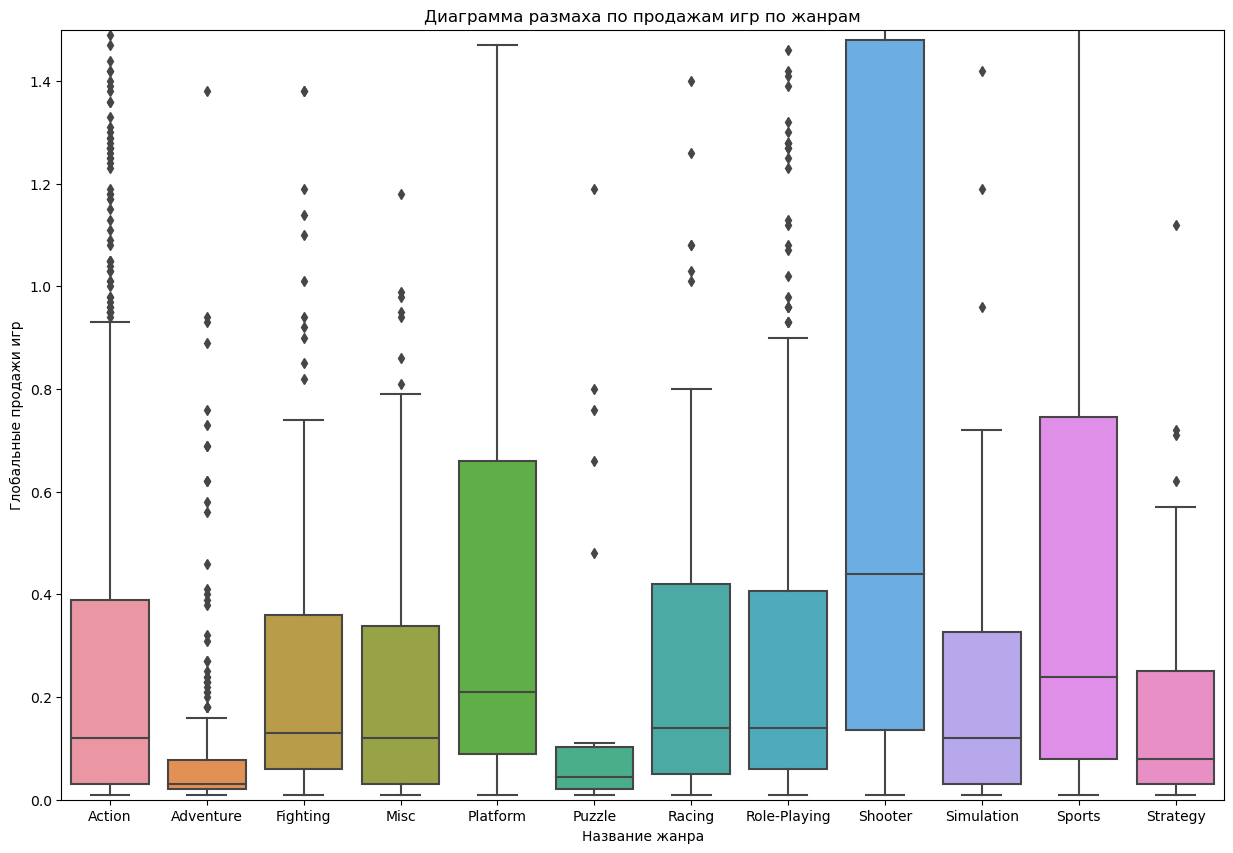

In [343]:
box = plt.subplots(figsize = (15,10))
box = sns.boxplot(data=new_data.sort_values(by='genre'), y='sales', x='genre')
box.set(ylim=(0, 1.5))
box.set(xlabel="Название жанра")
box.set(ylabel="Глобальные продажи игр")
box.set(title="Диаграмма размаха по продажам игр по жанрам")
plt.show()
# строю диаграмму размаха продаж по актуальным данным для каждого жанра с ограничением продаж не больше 1.5 миллионов

Распределение жанров очень разное, самый популярный жанр - экшн - было продано более 441 миллионов копий различных игр, всего в таком жанре выпущена тысяча игр, за ним идут шутеры 304 миллиона распродано, выпущено 235 игр, далее ролевые игры с продажами 192 миллиона и большим количеством игр, чем у шутеров, 370 штук. Замыкают рейтинг стратегии и пазлы, выпущено которых по 71 и 28 штук соответственно, а проданных копий 13 и 4 миллионов. Бросается в глаза жанр приключений, было выпущено 302 игры, но проданно лишь 29 миллионов копий. Однако по средним, медианным значениям лидируют шутеры, за ними спорт и платформер. Самые наименьшие средние продажи имеют игры в жанре приключения, пазлы и стратегии. 

**Вывод:** 

В третьем шаге была изучена информация по годам, самым продуктивным по играм оказался 2008 год, о платформах, на которые выпускают игры, за все время больше всего игр продалось на PS2, 1233 миллина игр. В среднем жизненый цикл платформы состовляет 10 лет, а популярна приставка в основном 5 лет. Оставили в датафрейме актуальные данные с 2012 года, чтобы прогноз на 2017 был более точным и не мешала устаревшая информация, например, про старые платформы, на которые игры уже не выпускают. В последние годы лидерами на рынке являются игры на PS4, PS3 и X360. Было установлено, что для большинства популярных платформ есть зависимость количества проданных копий от оценки игры критиком, однако пользователи почти не ориентируются на оценку других юзеров. В статистике по жанрам узнали, что экшн-игр было выпущено больше всего - тысяча, за ними ролевые, а замыкает жанр пазлов и стратерий - их было выпущено 28 и 71 соотвественно.

## Шаг 4. Портрет пользователя каждого региона

Визуализируем в цифрах, жанрах и платформах информацию о пользователях различных регионов, которые есть в данных: Северная Америка, Европа и Япония

Будем смотреть на то, какие платформы и жанры предпочитают в разных частях света. Составим топ-5 платформ, топ-5 жанров и влияние возрастного ограничения на проодажи в отдельных регионов. Для удобства подсчета и составления топов напишем функцию, которой будем передавать название столбца ('platform' и 'genre') и в цикле для каждого региона выводить первые пять платформ, на которые больше всего покупают игры.

In [344]:
def top2(parametr):

    # Создание списка из пастельных цветов
    pastel_colors = ['#654E92', '#6C9BCF', '#A5C0DD', '#EBD8B2', '#FFE4B5', '#ADD8E6', '#D8BFD8', '#F0E68C', '#AFEEEE', '#FFC0CB']
    # Создание сводной таблицы
    pivot = new_data.pivot_table(index=parametr, values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

    fig, axs = plt.subplots(1, 3, figsize=(19, 7)) # создаем фигуру с тремя осями в один ряд
    fig.suptitle('ТОП-5') # подписываем ее

    # Оставление только топ-5 значений и объединение остальных значений
    regions = ['na_sales', 'eu_sales', 'jp_sales']
    for i, region in enumerate(regions):

        top5 = pivot.nlargest(5, region)[region]
        other = pivot[region].sum() - top5.sum()
        top5['Other'] = other
        top5.plot(kind='pie', autopct='%1.1f%%', ax=axs[i], colors=pastel_colors)
        axs[i].set_ylabel(None)  # убираем подпись оси у
        axs[i].set_title(f"Продажи в регионе  {region.split('_')[0].upper()}") # подписываем саму диаграмму

    plt.show()

### Топ 5 платформ пользователей по регионам

Вызываем функцию, написанную выше и передаем ей название столбца, по которому хотим увидеть расчет, то бишь столбец с названиями приставок

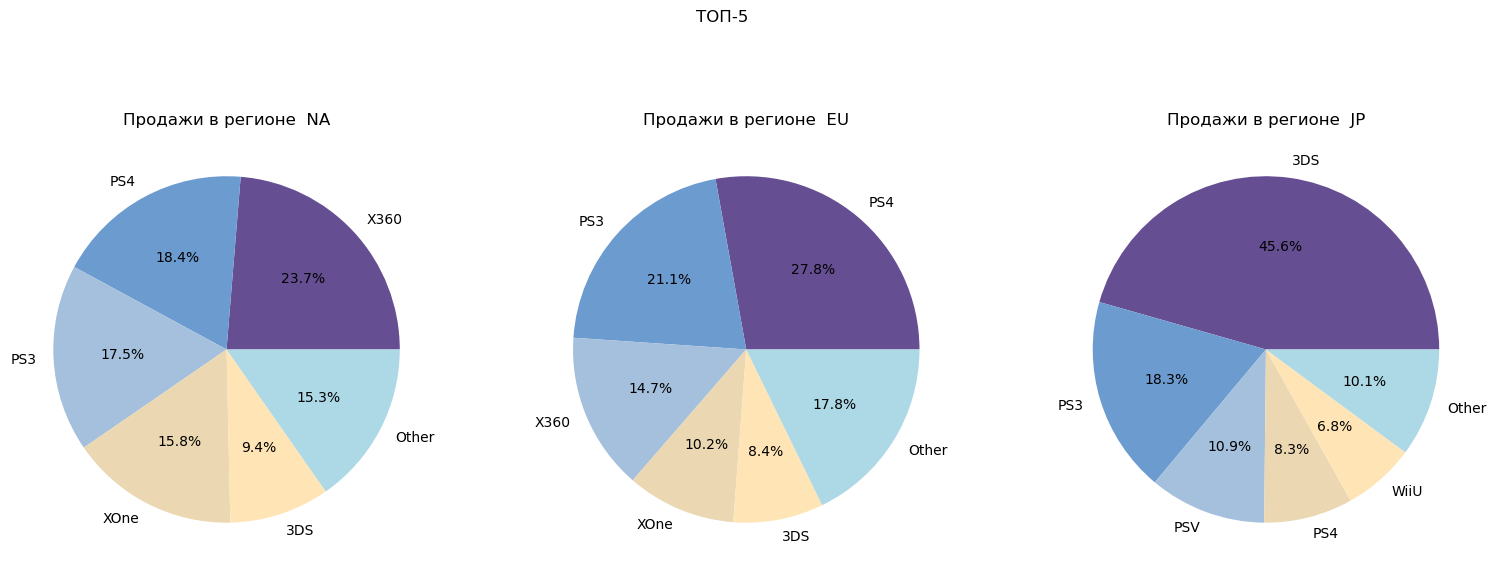

In [345]:
top2('platform')

В разных регионах на 1ом месте стоят разные приставки, в Северной Америке - это X360(американская компания - Microsoft) на нее купили 23.7% игр среди всех проданных там, в Европе PS4(японская компания - Sony) - 27.8% покупок на эту приставку, а в Японии 3DS (японский бренд - Nintendo) - 45.6%, почти половина всех проданных игр Японии была на эту приставку. На PS3 игр купили примерно одинаковая доля рользователей в кажждой стране 17.5%-21.1%. Интересное, распределение на приставки XBox (XOne и X360), в Северной Америке и Европе продажи на эти приставки вместе составили 39.5% и 24.9% всех игр, в то время, как в Японии эти приставки даже не вошли в топ-5.

### Топ 5 жанров пользователей по регионам

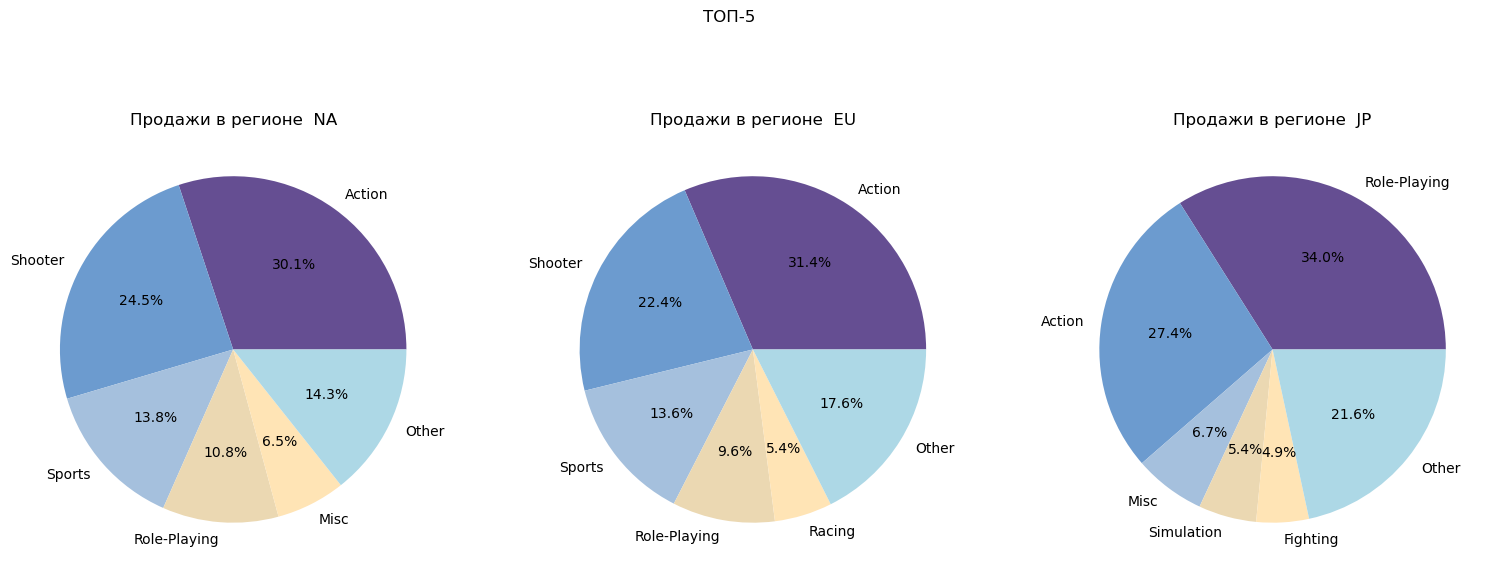

In [346]:
top2('genre')

Теперь узнаем, в какие игры любят играть пользователи в Северной Америке, Европе и Японии. 

Топ-5 популярынх платформ Северной Америки и Европы очень схожи жанрам и их процентам, первые 4 позиции одинаковые: экшн - около 30%, шутер - 22.4%-24%, спорт - 14% и ролевые - 10%,  а 5ое место различается, у Северной Америки смешынный жанр (6.5%), а в Европе гонки(5.4%). В Японии же картина вырисовывается другая: на первом месте ролевые игры - процент от всех японских покупок составляет 34%, затем экшн - 27.4%, смешанный жанр - 6.7%, симуляторы - 5.4% и файтинг - 4.9%, видны заметные отличия от других регионов. 

### Зависимость продаж от рейтинга ESRB по регионам.

Для начала узнаем подробнее про рейтинг, какие в нем обозначения

In [347]:
new_data['rating'].unique()

array(['M', nan, 'E', 'E10+', 'T'], dtype=object)

В актуальных данных присутствует всего 4 категории из рейтинга ESRB:
* M - повзрослевшие, 17+
* E - для всех, то есть 0+
* E10+ - для всех, 10+
* T - подростки , 13+

Заполним пропуски на значения отсутствия рейтинга "tbd" и посмотрим заново на распределение по возрастным ограничениям. Почитала про это предупреждение, которое ниже вылезло, что-то про копию, но на дальнейших шагах никак не отражается

In [348]:
new_data.loc[new_data['rating'].isna(), 'rating'] = 'tbd'

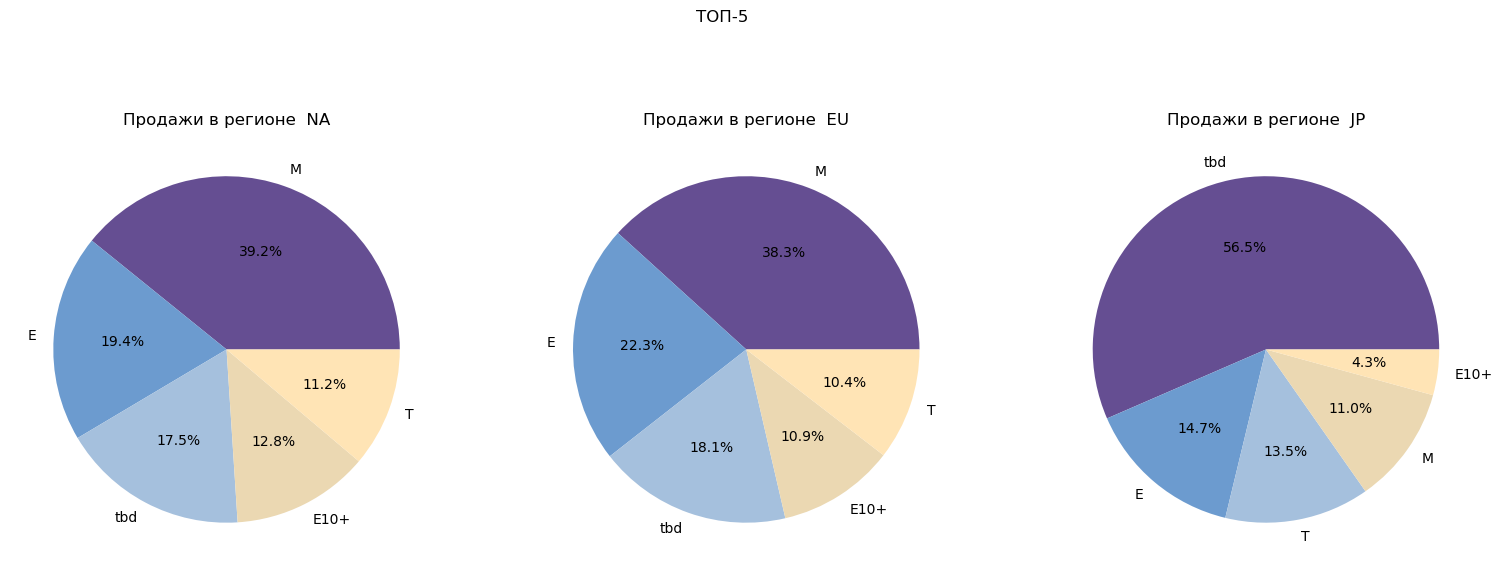

In [349]:
# Создание списка из пастельных цветов
pastel_colors = ['#654E92', '#6C9BCF', '#A5C0DD', '#EBD8B2', '#FFE4B5', '#ADD8E6', '#D8BFD8', '#F0E68C', '#AFEEEE', '#FFC0CB']
# Создание сводной таблицы
pivot = new_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

fig, axs = plt.subplots(1, 3, figsize=(19, 7)) # создаем фигуру с тремя осями в один ряд
fig.suptitle('ТОП-5') # подписываем ее

regions = ['na_sales', 'eu_sales', 'jp_sales']
for i, region in enumerate(regions):

    top5 = pivot.nlargest(5, region)[region]
    top5.plot(kind='pie', autopct='%1.1f%%', ax=axs[i], colors=pastel_colors)
    axs[i].set_ylabel(None)  # убираем подпись оси у
    axs[i].set_title(f"Продажи в регионе  {region.split('_')[0].upper()}") # подписываем саму диаграмму

plt.show()

В Северной Америке и Европе распределение почти идентичное и по процентам и по популярности категорий, на первом месте игры для взрослых (40%), на втором 0+(20%), на третьем игры у которых рейтинг отсутствует 'tbd' (18%), игры с ограничением 10+ покупали еще реже (11%) и на последнем месте игры для подростков, 13+(10%). 

Однако в Японии все по другому: более половины всех купленных игр оказались игры, рейтинг которых отсутствует - 56.5%, далее игры для всех 0+, для подростков 13+ и для взрослых занимают примерно ожинаковые доли (11-14.7%) и реже всего покупают игры 10+ (4.3%). Это потому, что в Японии есть своя рейтинговая система CERO

## Шаг 5. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сохраняем в переменные списки оценок пользователей на игры для приставок Xbox One и PC, удалив перед этим все NaN'ы

In [350]:
xone_users = new_data.query('platform == "XOne"')['user_score'].dropna().to_list()
pc_users = new_data.query('platform == "PC"')['user_score'].dropna().to_list()

Будем проводить T-тест Стьюдента, потому что нам надо сравнить средние значения двух групп. Выдвигаем нудевую гипотезу о равенстве средних для двух независимых выборок, а альтернативная гипотеза будет двухсторонння: средние не равны между собой.

Сформулируем нулевую и альтернативную гипотезы:
* **Н0**: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"
* **Н1**: "Средние пользовательские рейтинги платформ Xbox One и PC разные"

In [351]:
alpha = 0.05

result = st.ttest_ind(xone_users, pc_users)

print('p-значение:', result.pvalue)                                         # вывожу значение p-value

if result.pvalue < alpha:                                                   # сравниваю p-value с уровнем значимости
    print('Отвергаем нулевую гипотезу:'
          '\nсредние пользовательские рейтинги не равны')               
else:
    print('Не получилось отвергнуть нулевую гипотезу о равенстве средних рейтингов от пользователей') 

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу о равенстве средних рейтингов от пользователей


Нулевую гипотезу отвергнуть не получилось, поэтому есть большая вероятность, что **пользовательский рейтинг приставки XB One равен среднему рейтингу PC**. С большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий

### Средние пользовательские рейтинги жанров экшн и спорт разные

Сохраним столбец оценок пользователей в переменную, но без пропусков, удалим их и из датафрейма (сериеса) сделаем обычный список для оценок на экшн игры и спорт

In [352]:
action_users = new_data.query('genre == "Action"')['user_score'].dropna().to_list()
sport_users = new_data.query('genre == "Sports"')['user_score'].dropna().to_list()

Аналогично первому пункту будем сравнивать средние двух независимых выборок T-тестом

Сформулируем нулевую и альтернативную гипотезы:
* **Н0**: "Оценка пользователей на игры жанра экшн **равна** средней оценке на игры спортивного жанра"
* **Н1**: "Средние оценки пользователей на игры в жанрах спорт и экшн **не равны**"

In [353]:
alpha = 0.05

result = st.ttest_ind(action_users, sport_users)

print('p-значение:', result.pvalue)                                         # вывожу значение p-value

if result.pvalue < alpha:                                                   # сравниваю p-value с уровнем значимости
    print('Отвергаем нулевую гипотезу:'
          '\nсредние пользовательские рейтинги не равны')               
else:
    print('Не получилось отвергнуть нулевую гипотезу о равенстве средних рейтингов от пользователей') 

p-значение: 4.804523380462917e-26
Отвергаем нулевую гипотезу:
средние пользовательские рейтинги не равны


Нулевая гипотеза о равестве средних отвергнута в пользу альтернативной: **пользовательские средние оценки на экшн и спорт не равны**

У средних пользовательских оценок на жанры экшна и спортивный с большей долей вероятности имеют статистически значемые отличия

## Вывод

Перед началом проведения исследования данные были изучены и подготовлены к работой с ними: удалены неполные дубликаты, преобразованы типы данных, удалены строки, где пропуски в важных стоблцах, создан вспомогательный столбец для дальнейших расчетов.

**Основная информация о данных:**
* Данных в датафрейме за 27 лет, больше всего игр выпустили в 2008 году.
* В 2006-2011 годах был большой пик производительности игр, более тысячи штук в год.
* Данные за 2016 год неполные
* За все время самая популярная платформа оказалась PS2
* Жизненный цикл приставки в среднем 11 лет

Так как данные нужны для дальнейшего прогноза был выбран актульный период: 2012-2016 года.

**Исследование на актуальных данных:**
* Больше всего игр продали на приставки: PS4, PS3, X360
* Была выявлена зависимость количества продаж копий игр от оценок критиков, на оценки пользователей немного обращают внимание только пользователи DS3
* Самыми популярными жанрами оказалось экшены, шутеры и ролевые, а приключения, стратегии и пазлы на последних местах
 
**Исследование по регионам:** в ходе исследования оказалось, что Северная Америка и Европа довольно схожи между собой, в отличие от Японии.

*Северная Америка:*
* Самые популярные консоли: X360(23.7% проданных игр), PS4(18.4% проданных игр), PS3(17.5% проданных игр)
* Топ-5 жанров: экшн(30.1%), шутеры(24.5%), спортивные игры(13.8%), ролевые игры(10.8%), смешанный(6.5%)
* Зависимость продаж от ESRB: большую долю продаж состовляют игры для взрослых (39.2%), 19.4% игры без возрастного ограничения, без определенного рейтинга 17.5%, 12.8% игры 10+ и 11.2% для подростков.

*Европа:*
* Самые популярные консоли: PS4(27.8% проданных игр), PS3(21.1% проданных игр), X360(14.7% проданных игр)
* Топ-5 жанров: экшн(31.4%), шутеры(22.4%), спортивные игры(13.6%), ролевые игры(9.6%), гонки(5.4%)
* Зависимость продаж от ESRB: игры для взрослых (38.3%), 22.3% игры без возрастного ограничения, игры без рейтинга 18.1%, 10.9% игры 10+ и 10.4% для подростков.

*Япония:*
* Самые популярные консоли: 3DS(45.6% проданных игр), PS3(18.3% проданных игр), PSV(10.9% проданных игр)
* Топ-5 жанров: ролевые игры(34.0%), экшн(27.4%), смешанный(6.7%), симуляторы(5.4%), файтинг(4.9%)
* Зависимость продаж от ESRB: больше половины продаж были игры без рейтинга возрастного ограничения (56.5%), доли игр для всех(14,7%),  для подростков(13.5%) и для взрослых(11.0%) примерно одинаковые, а оставшаяся доля 10+ 4.3%

**Проверка гипотез:** в ходе проверки гипотез было выявлено:
* Средний пользовательский рейтинг приставки XB One равен среднему рейтингу PC
* Пользовательские средние оценки на экшн и спортивный жанр не равны

***По итогу, можно сделать вывод, что для пользователей Японии можно закупать игры разных жанров, но на платформу 3DS, для Северной Америки и Европы игры на приставки PS4, PS3 и X360 в жанрах экшн и шутер. Это все имеет больший спрос.***